170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1, Generator Loss: 1.6273, Discriminator Loss: 0.9854
Epoch 2, Generator Loss: 1.0117, Discriminator Loss: 0.9771
Epoch 3, Generator Loss: 0.9883, Discriminator Loss: 0.9920
Epoch 4, Generator Loss: 1.2472, Discriminator Loss: 1.2356
Epoch 5, Generator Loss: 1.3228, Discriminator Loss: 0.8165
Epoch 6, Generator Loss: 1.0950, Discriminator Loss: 0.9697
Epoch 7, Generator Loss: 1.6744, Discriminator Loss: 0.5412
Epoch 8, Generator Loss: 0.8965, Discriminator Loss: 1.4037
Epoch 9, Generator Loss: 1.0005, Discriminator Loss: 1.1985
Epoch 10, Generator Loss: 1.0032, Discriminator Loss: 1.2075


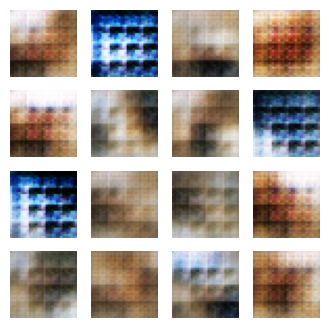

Epoch 11, Generator Loss: 0.9523, Discriminator Loss: 1.0223
Epoch 12, Generator Loss: 0.8626, Discriminator Loss: 1.1838
Epoch 13, Generator Loss: 0.8610, Discriminator Loss: 1.3460
Epoch 14, Generator Loss: 0.7614, Discriminator Loss: 1.4551
Epoch 15, Generator Loss: 0.9840, Discriminator Loss: 1.0277
Epoch 16, Generator Loss: 0.8073, Discriminator Loss: 1.2711
Epoch 17, Generator Loss: 0.8765, Discriminator Loss: 1.2282
Epoch 18, Generator Loss: 1.0593, Discriminator Loss: 1.1122
Epoch 19, Generator Loss: 1.0277, Discriminator Loss: 1.0220
Epoch 20, Generator Loss: 0.8328, Discriminator Loss: 1.3060


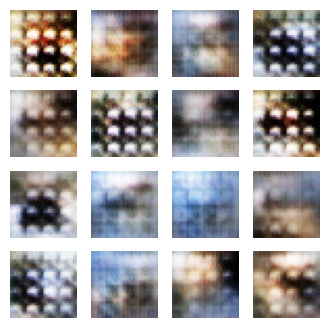

Epoch 21, Generator Loss: 0.9242, Discriminator Loss: 1.3000
Epoch 22, Generator Loss: 0.7495, Discriminator Loss: 1.5177
Epoch 23, Generator Loss: 1.1587, Discriminator Loss: 0.8568
Epoch 24, Generator Loss: 1.1339, Discriminator Loss: 1.0520
Epoch 25, Generator Loss: 1.1532, Discriminator Loss: 0.9466
Epoch 26, Generator Loss: 0.7690, Discriminator Loss: 1.3486
Epoch 27, Generator Loss: 0.9978, Discriminator Loss: 1.0482
Epoch 28, Generator Loss: 0.8671, Discriminator Loss: 1.3222
Epoch 29, Generator Loss: 0.9755, Discriminator Loss: 1.1824
Epoch 30, Generator Loss: 0.9834, Discriminator Loss: 1.2000


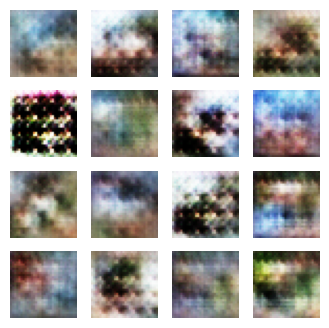

Epoch 31, Generator Loss: 0.7974, Discriminator Loss: 1.5097
Epoch 32, Generator Loss: 0.9731, Discriminator Loss: 1.3233
Epoch 33, Generator Loss: 0.9444, Discriminator Loss: 1.2457
Epoch 34, Generator Loss: 0.8784, Discriminator Loss: 1.3481
Epoch 35, Generator Loss: 1.0151, Discriminator Loss: 1.1279
Epoch 36, Generator Loss: 0.9952, Discriminator Loss: 1.2970
Epoch 37, Generator Loss: 0.9179, Discriminator Loss: 1.1455
Epoch 38, Generator Loss: 1.2159, Discriminator Loss: 0.8923
Epoch 39, Generator Loss: 1.3517, Discriminator Loss: 1.0167
Epoch 40, Generator Loss: 0.9666, Discriminator Loss: 1.2635


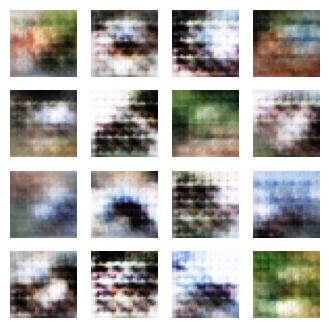

Epoch 41, Generator Loss: 1.1437, Discriminator Loss: 1.0606
Epoch 42, Generator Loss: 1.0241, Discriminator Loss: 1.1722
Epoch 43, Generator Loss: 0.8848, Discriminator Loss: 1.3497
Epoch 44, Generator Loss: 0.9315, Discriminator Loss: 1.3619
Epoch 45, Generator Loss: 1.1768, Discriminator Loss: 0.8900
Epoch 46, Generator Loss: 1.3437, Discriminator Loss: 0.7558
Epoch 47, Generator Loss: 1.2565, Discriminator Loss: 1.1020
Epoch 48, Generator Loss: 1.2550, Discriminator Loss: 1.0265
Epoch 49, Generator Loss: 1.2701, Discriminator Loss: 1.1419
Epoch 50, Generator Loss: 1.1783, Discriminator Loss: 1.0183


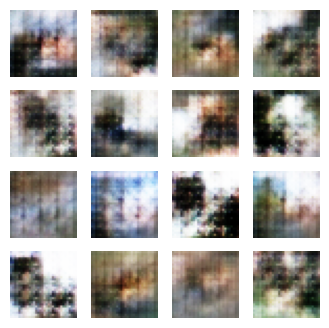

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

#Load Data Set
(train_images, _), (_, _) = tf.keras.datasets.cifar10.load_data()

#Pre-processing
train_images = (train_images.astype('float32') - 127.5) / 127.5  #Normalize to [-1, 1]
BUFFER_SIZE = 50000
BATCH_SIZE = 128
EPOCHS = 50
NOISE_DIM = 100

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

#Build Generator Model
def make_generator_model():
    model = models.Sequential()
    model.add(layers.Dense(4*4*256, use_bias=False, input_shape=(NOISE_DIM,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((4, 4, 256)))

    model.add(layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (3, 3), strides=(2, 2), padding='same', activation='tanh'))

    return model

#Build Discriminator Model
def make_discriminator_model():
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

#Loss Functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

#Optimizers
generator = make_generator_model()
discriminator = make_discriminator_model()

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

#Training Loop
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

#Training function
def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)

        print(f'Epoch {epoch+1}, Generator Loss: {gen_loss:.4f}, Discriminator Loss: {disc_loss:.4f}')
        if (epoch + 1) % 10 == 0:
            generate_and_plot_images(generator)

#Generate and plot images
def generate_and_plot_images(model, num_images=16):
    noise = tf.random.normal([num_images, NOISE_DIM])
    generated_images = model(noise, training=False)

    plt.figure(figsize=(4, 4))
    for i in range(num_images):
        plt.subplot(4, 4, i+1)
        plt.imshow((generated_images[i, :, :, :] + 1) / 2)
        plt.axis('off')
    plt.show()

#Start training
train(train_dataset, EPOCHS)
